
# Project: Investigate a Dataset (The Movie Database TMDb)

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from **The Movie Database (TMDb)**,including user ratings and revenue.
> It is contains 21 original columns like (id , budjet , revenue , vote_rate and original title ....  ect)
> Some columns we will drop it because it is not important for us in the analysis process
> We will add **two** column after processing another column and make calculation. This tow column will help us in our investigation
> Our main purpose of this project to wrangling the data int this dataset and make analysis to gain information about cenima maker decisions on this period
> Also collect some information about the best film and long one and the kind of films more watching
### My questions to investigate the dataset :
   >>  - Finding the Movies with high and low **profit**
   >>  - Finding the Movies with high and low **voteing**  
   >>  - Finding the Movies with high and low **runtime**  
   >>  - Statictics about **Runtime**
   >>  - Finding the most and the lowest artists acting in this group of movies
   >>  - Types of movies

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb

### My functions come here !!!!!!!

In [2]:
# This function using to split **movie type** from the genres column
def strip_style(strip_txt):
    movie_style_lst=[]
    movie_style_lst=strip_txt.split("|")
    fst_inxd=movie_style_lst[0]
    return fst_inxd

In [3]:
# This function to adding new column called profit to our dataset contains subtraction operation of [revenue_adj - budget_adj]
def profit_cal(df_come): #df_come is the dataframe come pass to the function
    df_come.insert(13,'profit_adj',df_come['revenue_adj']-df_come['budget_adj'])
    return df_come

In [4]:
# This function using to add new column called movie_style to our dataset contains movie type
def movie_type(df_come): #df_come is the dataframe come pass to the function
    df_come['movie_style'] = df_come['genres'].apply(strip_style)
    return df_come

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("Database_TMDb_movie_data.csv")
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Descovering Our Data Before Cleaning Step
row,col =df.shape
print('There is {} films in our dataset contains {} intities'.format(row,col))

There is 10866 films in our dataset contains 21 intities


In [7]:
#Checking for duplicate data
print('There is {} douplicated values in our dataset'.format(df.duplicated().sum()))

There is 1 douplicated values in our dataset


### Data Clearing :
    - Delete duplicate values
    - Replace 0's value with NaN 
    - Drop NaN values
    - Delete non necessary columns
    - Change some column data type
    

In [8]:
df.drop_duplicates(keep ='first', inplace=True)
print('There is {} douplicated values in our dataset'.format(df.duplicated().sum()))
row =df.shape[0]
print('There is {} films in our dataset.'.format(row))

There is 0 douplicated values in our dataset
There is 10865 films in our dataset.


In [9]:
# show 0's data in specific cols
df.query('budget == 0 or revenue == 0 or runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


#### 1-Replace 0's values witn NAN and drop it from our dataset

In [10]:
# Replace 0's values witn NAN and drop it from our dataset

df[['budget','revenue','runtime']] = df[['budget','revenue','runtime']].replace(0, np.NAN)
df.dropna(subset = ['budget','revenue','runtime'], inplace = True)

In [11]:
row =df.shape[0]
print('There is {} films in our dataset.'.format(row))

There is 3854 films in our dataset.


#### 2-Deleting not necessary columns

In [12]:
# create a list containing unnecessary columns to delete it
count_col = 0
for col_name in df.columns:
    count_col =count_col + 1
    if col_name == 'imdb_id'and count_col == 2 :
        del_data=[ 'imdb_id', 'popularity',  'homepage', 'tagline','keywords', 'overview', 'production_companies', 'vote_count']
        df = df.drop(del_data,1)
df.head()

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


#### 3-Changing Datatypes of columns

In [13]:
# Changing some columns type like money and time
df[['budget','revenue','budget_adj','revenue_adj']]=df[['budget','revenue','budget_adj','revenue_adj']].applymap(np.int64)
df.release_date = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis

Looking at data after making necessary changes


In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
df.head(3)

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,137999939,1392445892
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,137999939,348161292
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,101199955,271619025


### Processing data for easy analysis


#### 1-Finding the Movie profit from production date till now so we must using budget_adj and revenue_adj columns to calculate the profite

In [15]:
# calculate profit value 
df = profit_cal(df)

#### 2-Find the Movie genres

In [16]:
# split movie genres from genres column and insert it in new column using **movie_type function**
df = movie_type(df)

In [17]:
# show 5 rows from our new dataset
df.head(5)

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit_adj,movie_style
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,137999939,1392445892,1254445953,Action
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,137999939,348161292,210161353,Action
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,101199955,271619025,170419070,Adventure
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,183999919,1902723129,1718723210,Action
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,7.3,2015,174799923,1385748801,1210948878,Action


### Research Question 1-  Finding the Movies with high and low profit 

In [18]:
# find movies with low and high profit
high_profit= df['profit_adj'].idxmax()
high_profit=pd.DataFrame(df.loc[high_profit])
low_profit= df['profit_adj'].idxmin()
low_profit=pd.DataFrame(df.loc[low_profit])
print_value = pd.concat([high_profit,low_profit],axis=1)
print_value

,1329,2244
id,11,46528
budget,11000000,425000000
revenue,775398007,11087569
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121.0,100.0
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_average,7.9,6.4


    - Star Wars Film is the highest profit film with 2750136651 Dollars
    - The Warrior's Way is the lowest profit film with -413912431 Dollars

In [19]:
# Find the year with the max value of profit
profit_adj = df.groupby('release_year')['profit_adj'].sum()
print('The year which has the max profit is :{}'.format(profit_adj.idxmax()))
# Find the year with the min value of profit
profit_adj = df.groupby('release_year')['profit_adj'].sum()
print('The year which has the min profit is :{}'.format(profit_adj.idxmin()))


The year which has the max profit is :2015
The year which has the min profit is :1966


### Research Question 2 - Finding the Movies with high and low voteing  

In [20]:
# find movies with low and high vote
high_vote= df['vote_average'].idxmax()
high_vote=pd.DataFrame(df.loc[high_vote])
low_vote= df['vote_average'].idxmin()
low_vote=pd.DataFrame(df.loc[low_vote])
print_value = pd.concat([high_vote,low_vote],axis=1)
print_value

,4178,4859
id,278,116977
budget,25000000,65000000
revenue,28341469,73706
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
runtime,142.0,87.0
genres,Drama|Crime,Animation|Action|Comedy|Family
release_date,1994-09-10 00:00:00,2012-06-15 00:00:00
vote_average,8.4,2.2


    - The Shawshank Redemption Film is the highest voting film with 8.4 rate
    - Foodfight Film is the lowest voting film with 2.2 rate

### Research Question3 - Finding the Movies with high and low **runtime**  

In [21]:
# find movies with low and high runtime
high_runtime= df['runtime'].idxmax()
high_runtime=pd.DataFrame(df.loc[high_runtime])
low_runtime= df['runtime'].idxmin()
low_runtime=pd.DataFrame(df.loc[low_runtime])
print_value = pd.concat([high_runtime,low_runtime],axis=1)
print_value

,2107,5162
id,43434,24914
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338.0,15.0
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
vote_average,6.2,6.8


    - Carlos Film is the highest Runtime film with 338.0​ mins rate
    - Kid's Story Film is the lowest Runtime film with 15.0 mins rate

### Research Question 4 - Statictics about Runtime

In [22]:
print('The average of the runtime of all movies is :{} mins'.format(df['runtime'].mean()))
print('The Maximim duration of movie is :{} mins'.format(df['runtime'].max()))
print('The Minimum duration of movie is :{} mins'.format(df['runtime'].min()))

The average of the runtime of all movies is :109.22029060716139 mins
The Maximim duration of movie is :338.0 mins
The Minimum duration of movie is :15.0 mins


#### Drow graph about Runtime

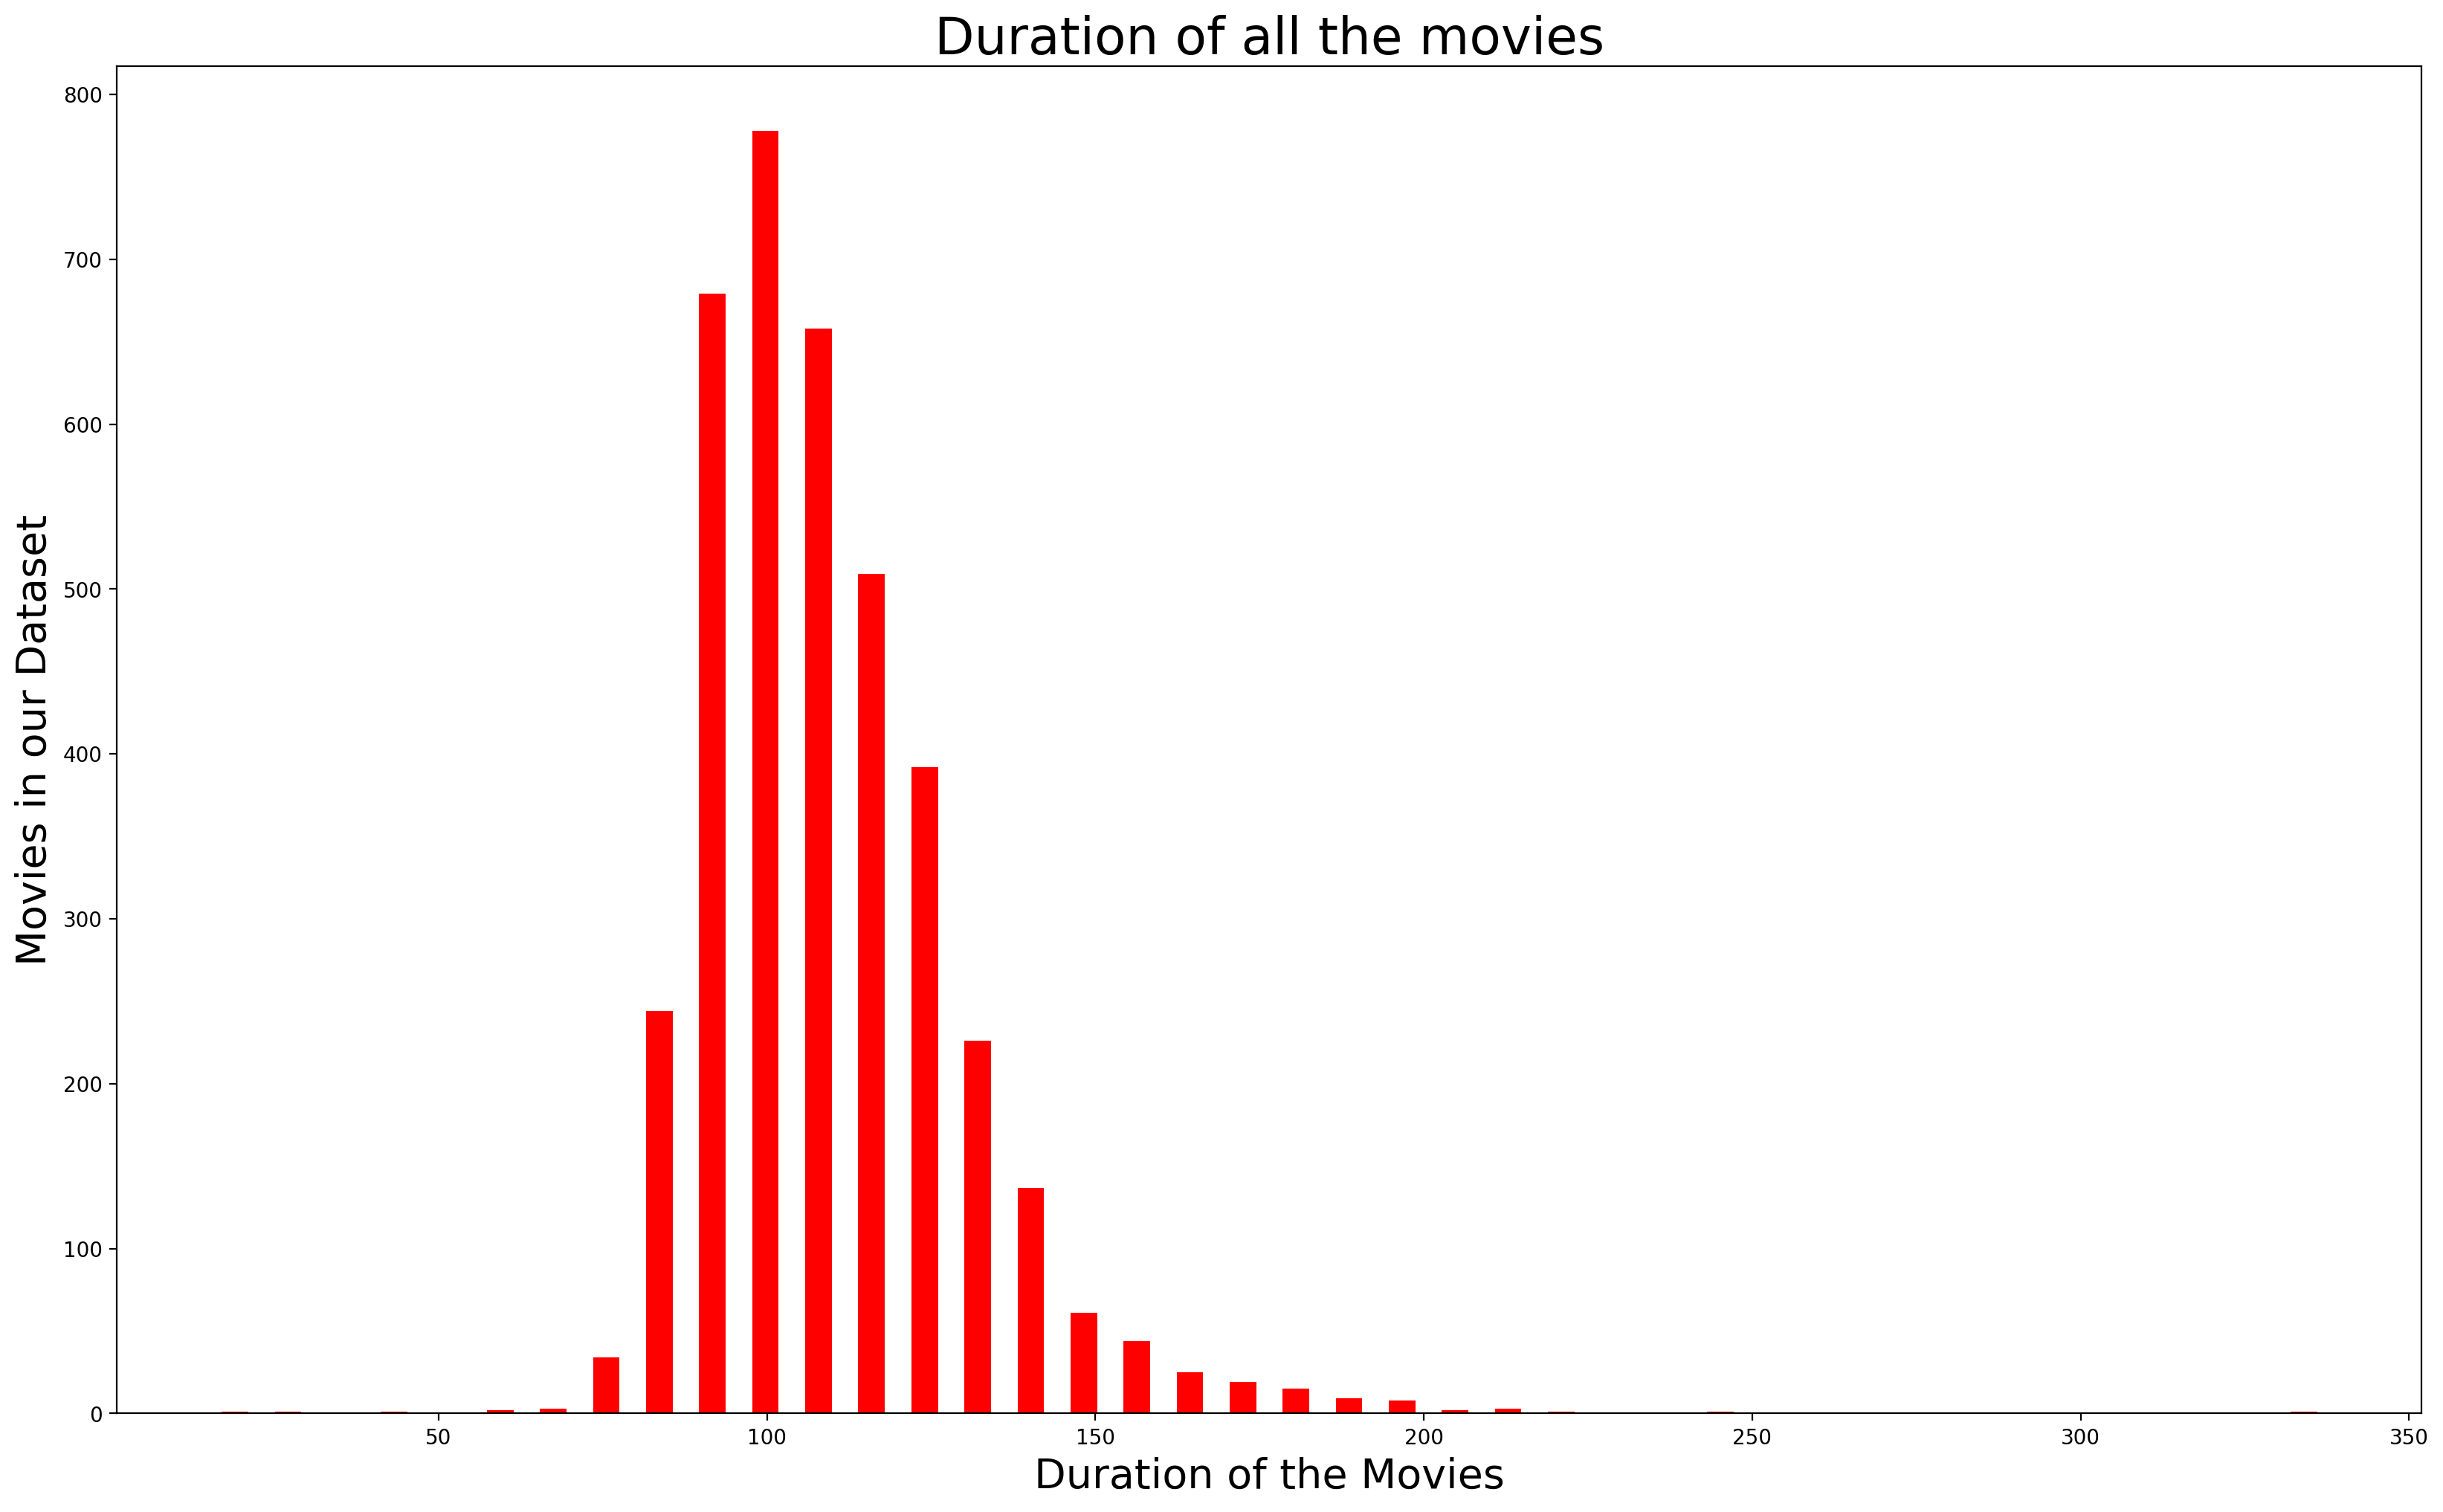

In [23]:
plt.figure(figsize=(20,12), dpi = 200)
plt.xlabel('Duration of the Movies', fontsize = 20)
plt.ylabel('Movies in our Dataset', fontsize=20)
plt.title('Duration of all the movies', fontsize=25)
plt.hist(df['runtime'], rwidth = 0.5, bins =40,color='r')
plt.show()

##### The graph above ilustrate that most movies runtime between 50 to 200 mins.

#### Runtime analysis using box plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


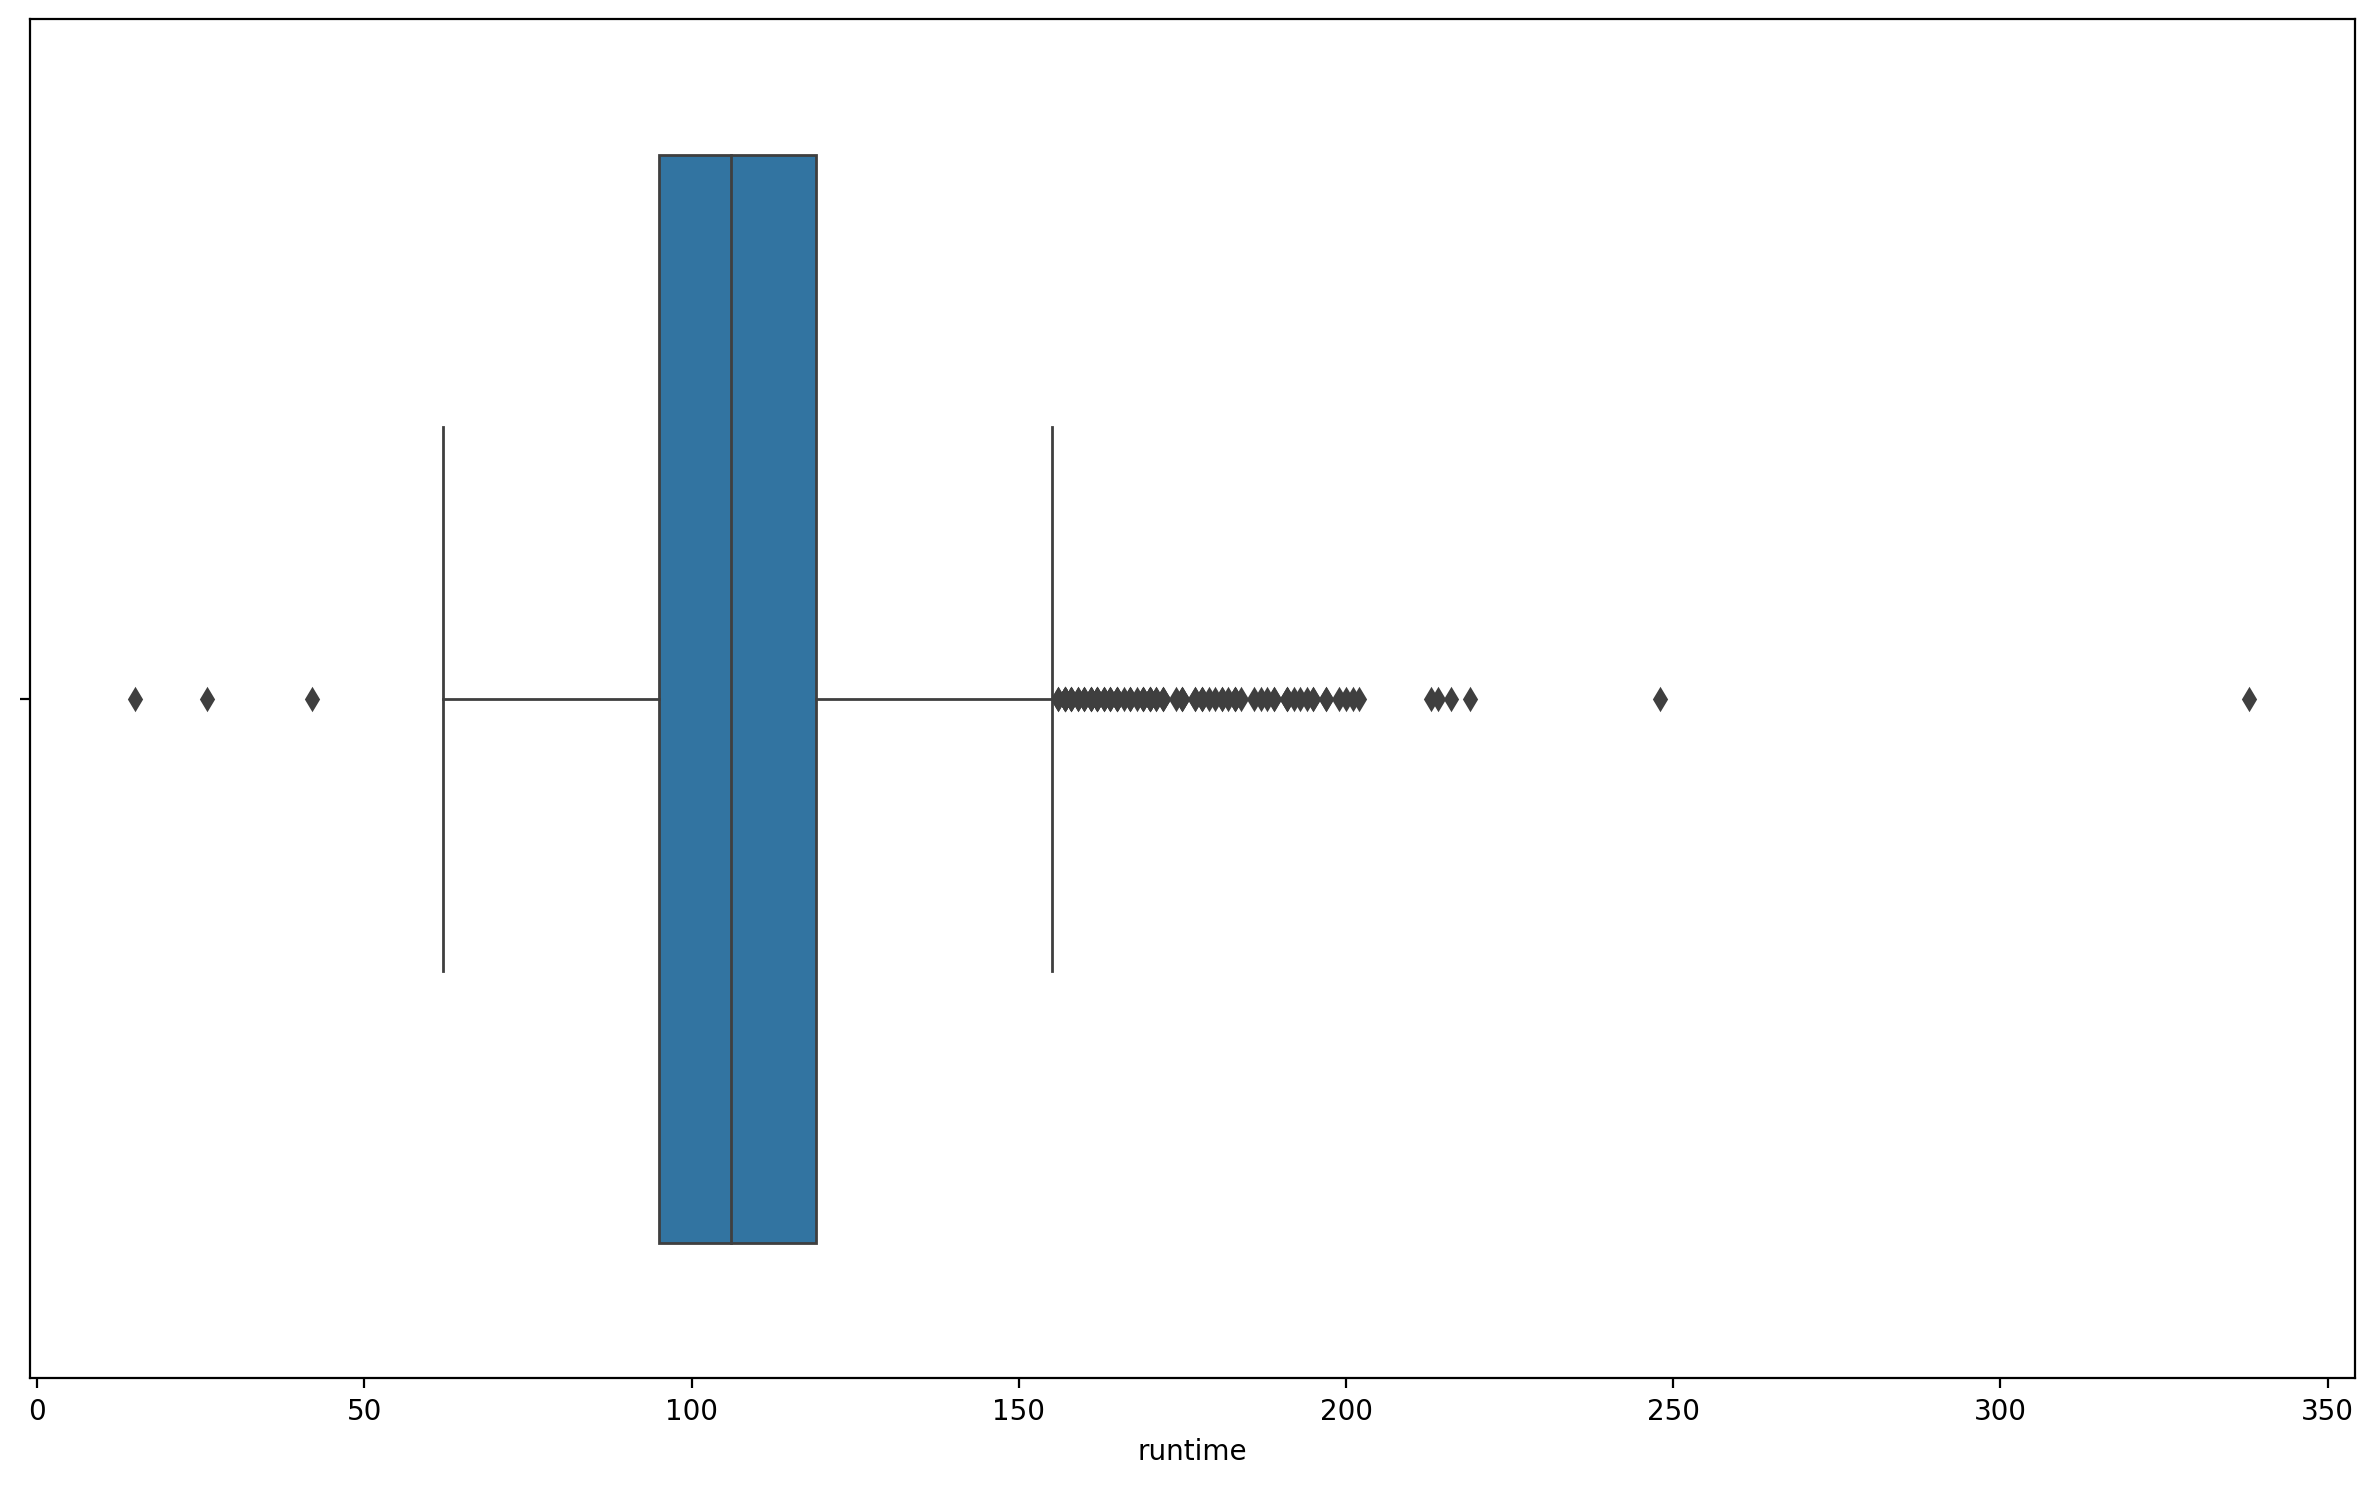

In [24]:
plt.figure(figsize=(15,9), dpi = 200)
snb.boxplot(df['runtime'], linewidth = 1)
plt.show()

### Research Question 5 - Finding the most and the lowest artists acting in this group of movies

In [25]:
#Separate the string in column cast by '|'
artist = df['cast'].str.cat(sep = '|')
#giving pandas series and storing the values separately
artist = pd.Series(artist.split('|'))
artist_counter = artist.value_counts(ascending = False)
artist_counter.head()    

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

In [26]:
artist_counter = artist.value_counts(ascending = True)
artist_counter  

Peter Graves              1
Alec McCowen              1
Nora von WaldstÃ¤tten     1
Mark Elderkin             1
James Whitmore            1
                         ..
Matt Damon               36
Nicolas Cage             43
Samuel L. Jackson        44
Bruce Willis             46
Robert De Niro           52
Length: 6839, dtype: int64

### Research Question 6 - Types of movies

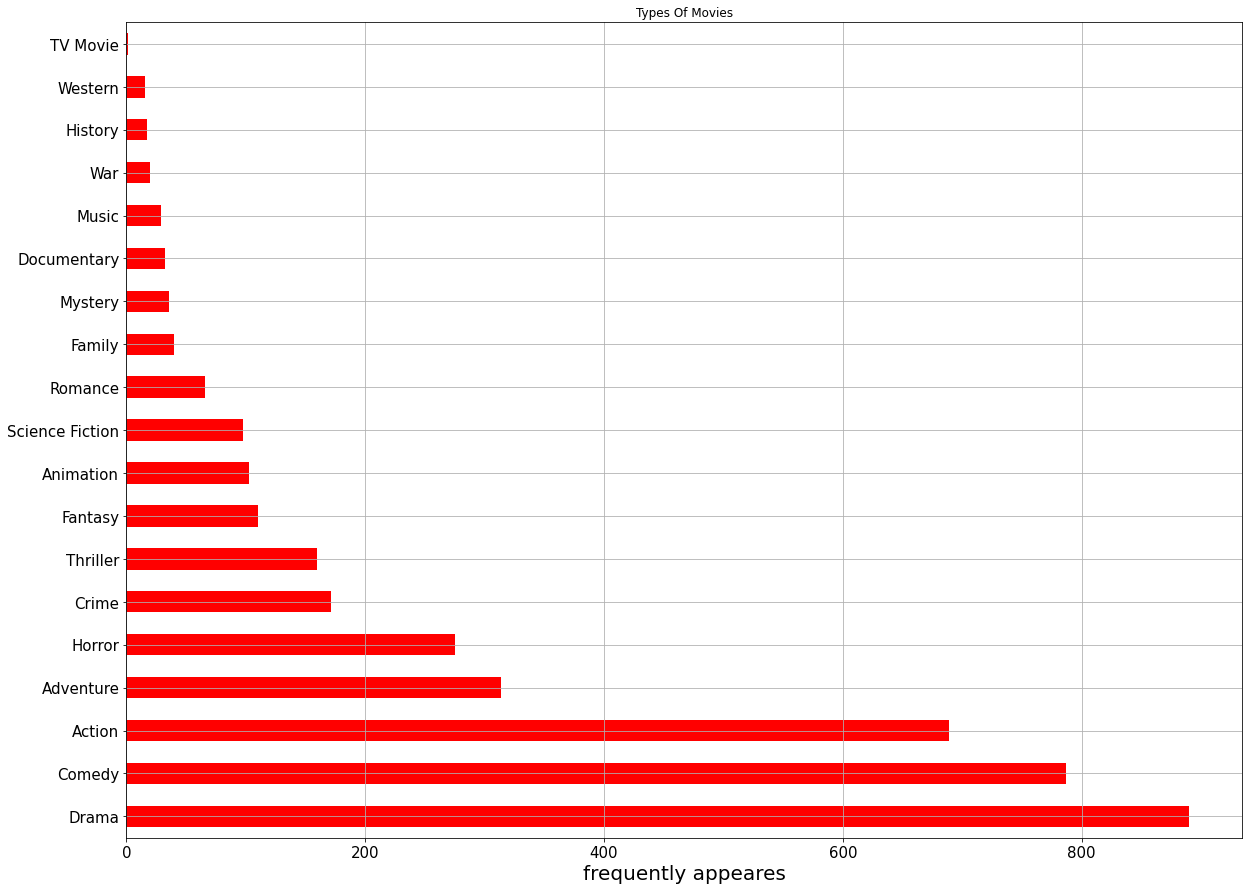

In [27]:
movie_type = df['movie_style']
movie_type = pd.Series(movie_type)
type_counter = movie_type.value_counts(ascending = False)
gr = type_counter.plot.barh(color = 'r', fontsize = 15)
gr.set(title = 'Types Of Movies')
gr.set_xlabel('frequently appeares', color = 'black', fontsize = '20')
gr.figure.set_size_inches(20, 15)
gr.grid(True)

plt.show()

    - It turns out that the most produced films are Drama followed by Comedy and Action films
    - It turns out that the lowest produced films are TV Movies preceded by Western and History films

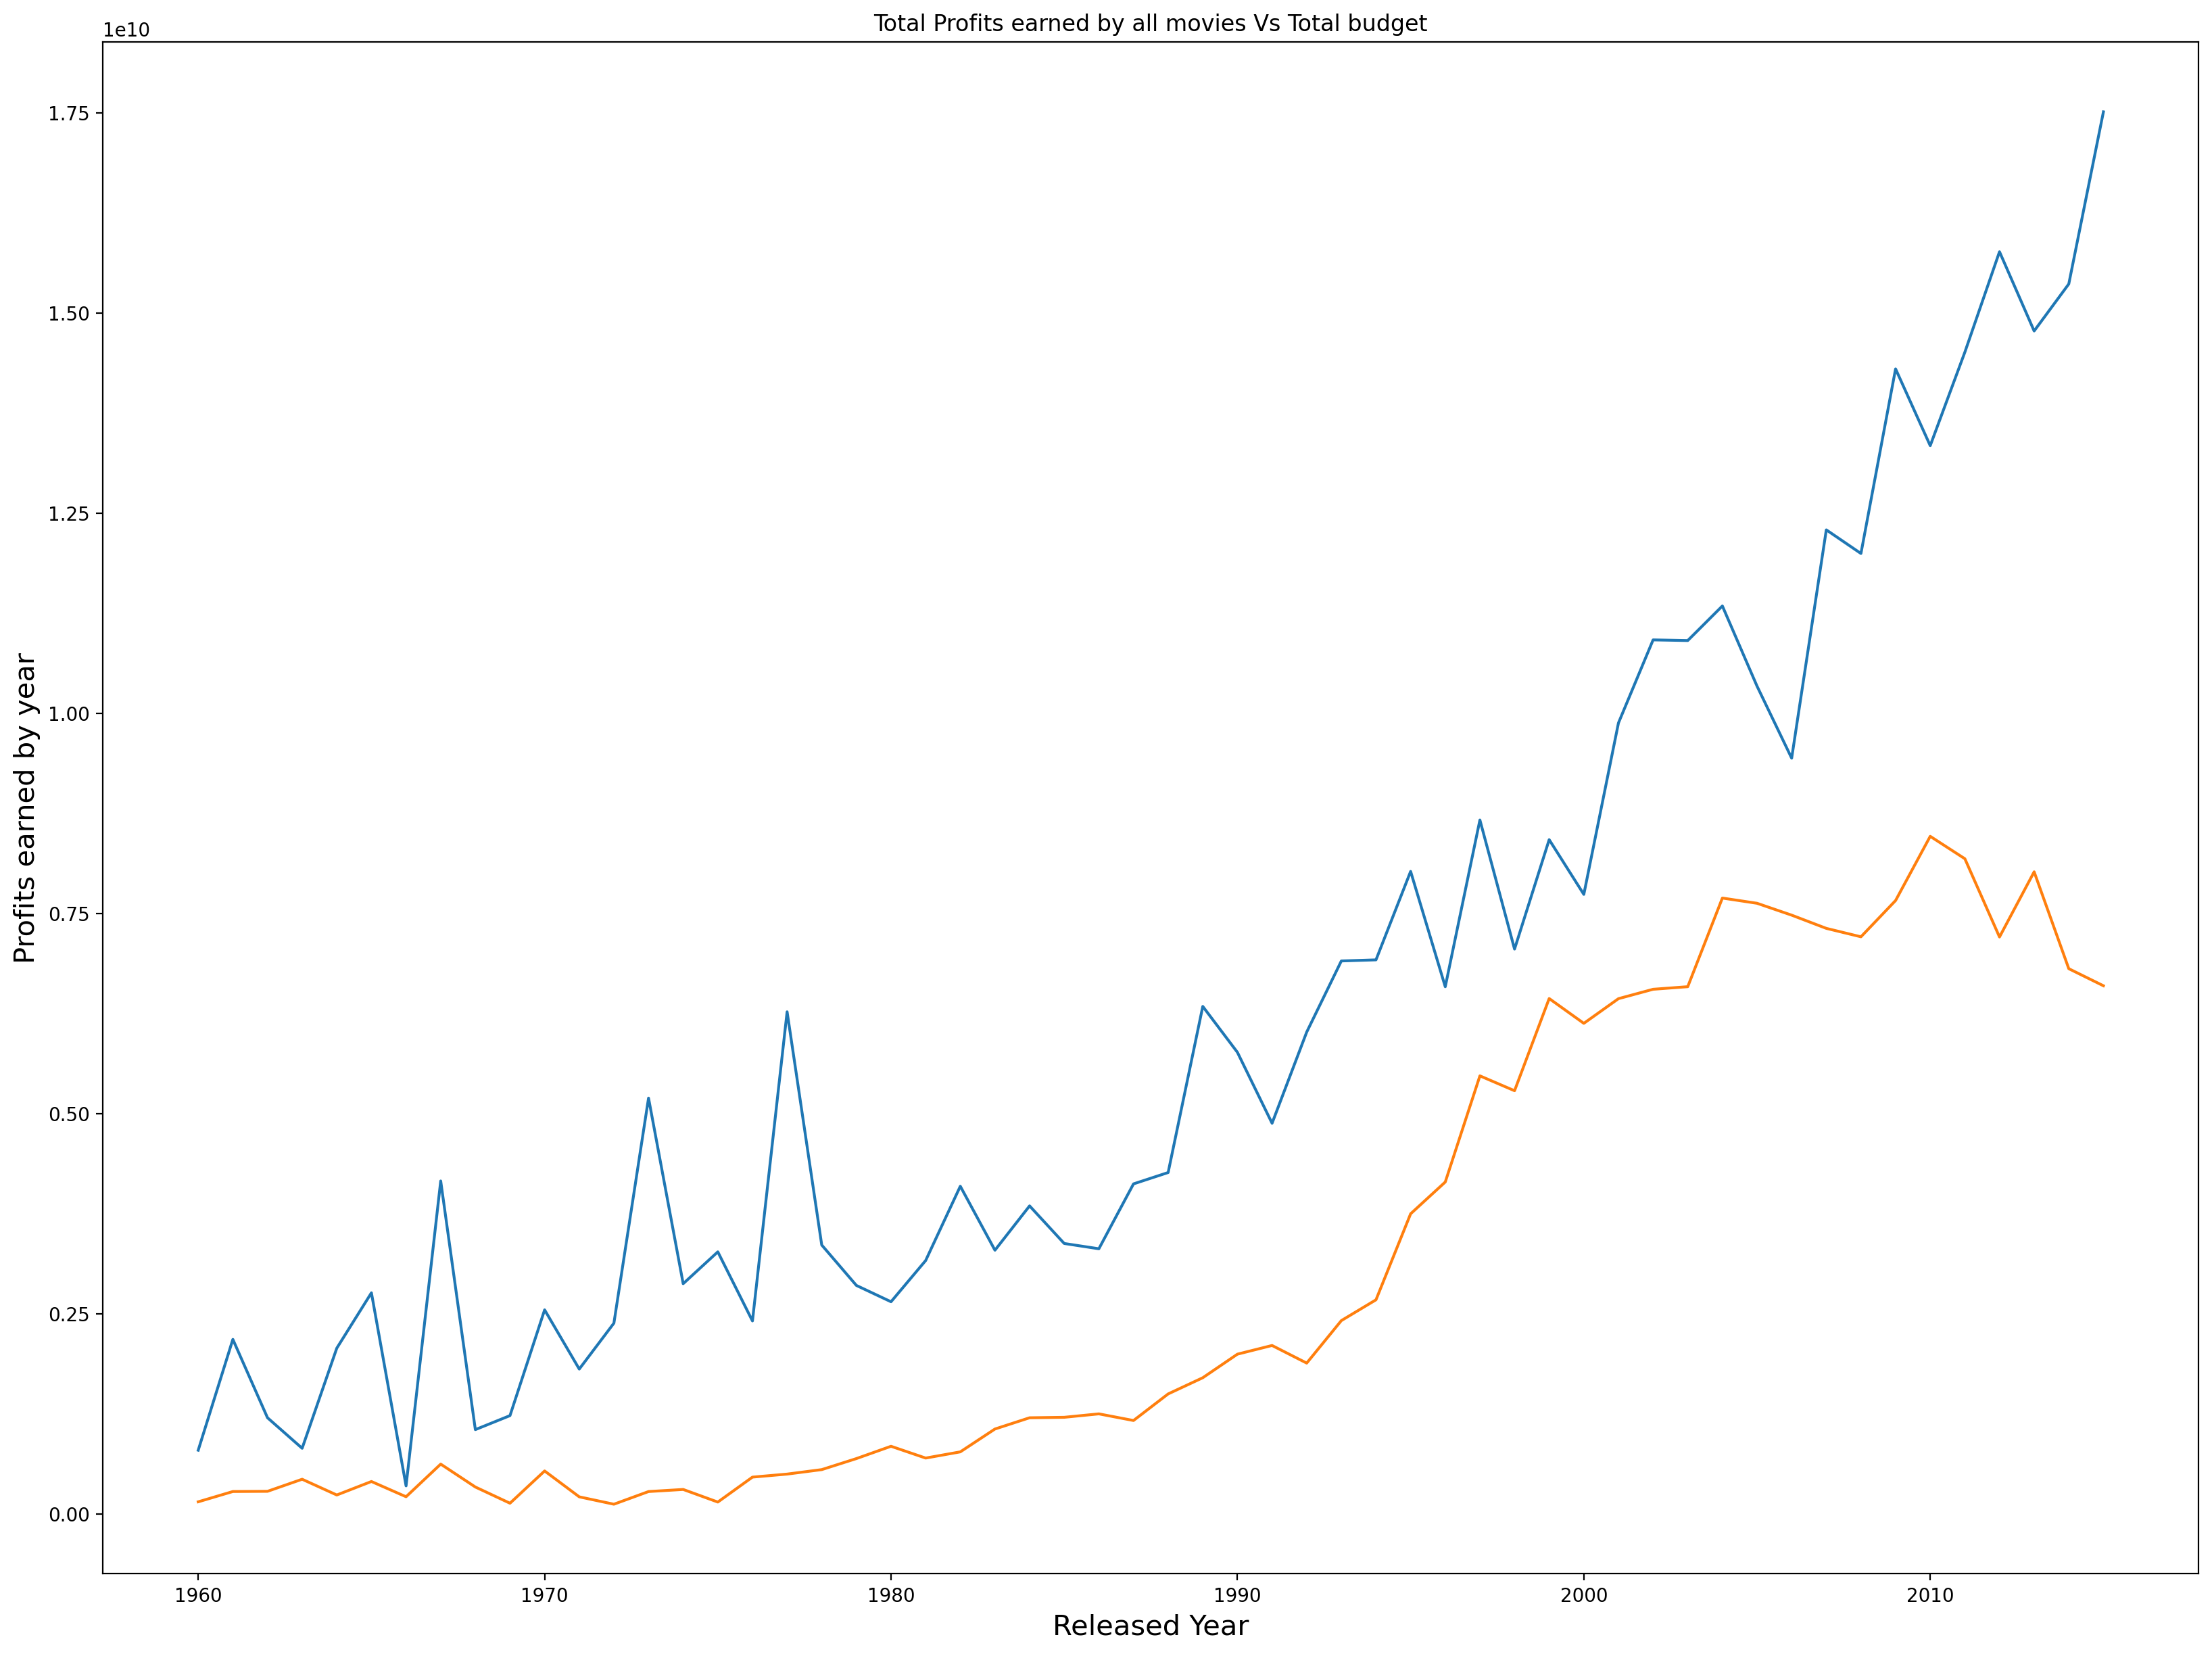

The Max profit year is : 2015
The Max budjet year is : 2010
The Min profit year is : 1966
The Min budjet year is : 1972


In [28]:
#Using Line plot for comparing between otal Profits earned by all movies Vs Total budget

profits_adj_yearly = df.groupby('release_year')['profit_adj'].sum()
budjet_adj_yearly = df.groupby('release_year')['budget_adj'].sum()
plt.figure(figsize=(20,15), dpi = 200)
plt.xlabel('Released Year', fontsize = 15)
plt.ylabel('Profits earned by year', fontsize = 15)
plt.title('Total Profits earned by all movies Vs Total budget')
plt.plot(profits_adj_yearly)
plt.plot(budjet_adj_yearly)
plt.show()
print('The Max profit year is : {}'.format(profits_adj_yearly.idxmax()))
print('The Max budjet year is : {}'.format(budjet_adj_yearly.idxmax()))
print('The Min profit year is : {}'.format(profits_adj_yearly.idxmin()))
print('The Min budjet year is : {}'.format(budjet_adj_yearly.idxmin()))

    - We can see here always the profet more than budjet.
    - A steady rise in expenses and profits

<a id='conclusions'></a>
## Conclusions

### Limitations:
    This dataset contains information about 10,000 movies collected from **The Movie Database (TMDb)**,but it has alot of missing values and nonnecessary informations 
   #### missing values : 
       Columns like revenue, budget and runtime it is contanin 0 values. So in cleaning stage we drop it
   #### Non necessary data :
       Columns like'imdb_id', 'popularity','homepage','tagline','keywords','overview','production_companies','vote_count' 
       not necessery for me so i drop it also
### To be Good analysis :
    1- add new column it called profit_adj it is contains the subistitute of revene _adj from budjet_adj by profit_cal fun
    2- add new column called movie_style contains movie style or kind using function to split the type from genres column
    3- Finding the Movies with high and low profit
    4- Finding the Movies with high and low voting
    5- Finding the Movies with high and low runtime or duration
    6- Find the year with the max and min value of profit
    7- The average of the runtime of all movies is :109.22029060716139 mins
    8- The Maximim duration of movie is :338.0 mins
    9- The Minimum duration of movie is :15.0 mins
    10- Drow graph about duration of all the movies
    11- Finding the most artist acting in this group of movies (Robert De Niro with 52 movies)
    12- Drow graph all types of movies
    

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1